# Case 6 in R

In [21]:
setwd("/Users/albertasuncion_mac/Documents/SMU/7333 - Quantifying the World/Github/7333-Quant-World/data")

In [22]:
txt = readLines("trace.txt")

Warning message in readLines("trace.txt"):
“incomplete final line found on 'trace.txt'”

In [23]:
head(txt)

[1] "# timestamp=2006-02-11 08:31:58"                                                                                                                                                                                                                                                                                                                                                                                                                                 
[2] "# usec=250"                                                                                                                                                                                                                                                                                                                                                                                                                                                      
[3] "# minReadings=110"                                                                                                                                                                                                                                                                                                                                                                                                                                               
[4] "t=1139643118358;id=00:02:2D:21:0F:33;pos=0.0,0.0,0.0;degree=0.0;00:14:bf:b1:97:8a=-38,2437000000,3;00:14:bf:b1:97:90=-56,2427000000,3;00:0f:a3:39:e1:c0=-53,2462000000,3;00:14:bf:b1:97:8d=-65,2442000000,3;00:14:bf:b1:97:81=-65,2422000000,3;00:14:bf:3b:c7:c6=-66,2432000000,3;00:0f:a3:39:dd:cd=-75,2412000000,3;00:0f:a3:39:e0:4b=-78,2462000000,3;00:0f:a3:39:e2:10=-87,2437000000,3;02:64:fb:68:52:e6=-88,2447000000,1;02:00:42:55:31:00=-84,2457000000,1"
[5] "t=1139643118744;id=00:02:2D:21:0F:33;pos=0.0,0.0,0.0;degree=0.0;00:14:bf:b1:97:8a=-38,2437000000,3;00:0f:a3:39:e1:c0=-54,2462000000,3;00:14:bf:b1:97:90=-56,2427000000,3;00:14:bf:3b:c7:c6=-67,2432000000,3;00:14:bf:b1:97:81=-66,2422000000,3;00:14:bf:b1:97:8d=-70,2442000000,3;00:0f:a3:39:e0:4b=-79,2462000000,3;00:0f:a3:39:dd:cd=-73,2412000000,3;00:0f:a3:39:e2:10=-83,2437000000,3;02:00:42:55:31:00=-85,2457000000,1"                                   
[6] "t=1139643119002;id=00:02:2D:21:0F:33;pos=0.0,0.0,0.0;degree=0.0;00:14:bf:b1:97:8a=-38,2437000000,3;00:0f:a3:39:e1:c0=-54,2462000000,3;00:14:bf:b1:97:90=-57,2427000000,3;00:14:bf:b1:97:81=-66,2422000000,3;00:14:bf:3b:c7:c6=-69,2432000000,3;00:14:bf:b1:97:8d=-70,2442000000,3;00:0f:a3:39:e0:4b=-78,2462000000,3;00:0f:a3:39:e2:10=-83,2437000000,3;00:0f:a3:39:dd:cd=-65,2412000000,3;02:64:fb:68:52:e6=-90,2447000000,1"

__Number of rows of text__

In [24]:
length(txt)

[1] 16490

__Number of commented rows__

In [25]:
sum(substr(txt, 1, 1) == "#")

[1] 579

### Understanding the dataset

In [26]:
# Check row 4, the first line that's not a comment
strsplit(txt[4], ";")[[1]]

[1] "t=1139643118358"                    "id=00:02:2D:21:0F:33"              
 [3] "pos=0.0,0.0,0.0"                    "degree=0.0"                        
 [5] "00:14:bf:b1:97:8a=-38,2437000000,3" "00:14:bf:b1:97:90=-56,2427000000,3"
 [7] "00:0f:a3:39:e1:c0=-53,2462000000,3" "00:14:bf:b1:97:8d=-65,2442000000,3"
 [9] "00:14:bf:b1:97:81=-65,2422000000,3" "00:14:bf:3b:c7:c6=-66,2432000000,3"
[11] "00:0f:a3:39:dd:cd=-75,2412000000,3" "00:0f:a3:39:e0:4b=-78,2462000000,3"
[13] "00:0f:a3:39:e2:10=-87,2437000000,3" "02:64:fb:68:52:e6=-88,2447000000,1"
[15] "02:00:42:55:31:00=-84,2457000000,1"

In [27]:
unlist(lapply(strsplit(txt[4], ";")[[1]],
              function(x)
                sapply(strsplit(x, "=")[[1]], strsplit, ",")))

t       1139643118358                  id   00:02:2D:21:0F:33 
                "t"     "1139643118358"                "id" "00:02:2D:21:0F:33" 
                pos        0.0,0.0,0.01        0.0,0.0,0.02        0.0,0.0,0.03 
              "pos"               "0.0"               "0.0"               "0.0" 
             degree                 0.0   00:14:bf:b1:97:8a   -38,2437000000,31 
           "degree"               "0.0" "00:14:bf:b1:97:8a"               "-38" 
  -38,2437000000,32   -38,2437000000,33   00:14:bf:b1:97:90   -56,2427000000,31 
       "2437000000"                 "3" "00:14:bf:b1:97:90"               "-56" 
  -56,2427000000,32   -56,2427000000,33   00:0f:a3:39:e1:c0   -53,2462000000,31 
       "2427000000"                 "3" "00:0f:a3:39:e1:c0"               "-53" 
  -53,2462000000,32   -53,2462000000,33   00:14:bf:b1:97:8d   -65,2442000000,31 
       "2462000000"                 "3" "00:14:bf:b1:97:8d"               "-65" 
  -65,2442000000,32   -65,2442000000,33   00:14:bf:b1:97:81   -65,2422000000,31 
       "2442000000"                 "3" "00:14:bf:b1:97:81"               "-65" 
  -65,2422000000,32   -65,2422000000,33   00:14:bf:3b:c7:c6   -66,2432000000,31 
       "2422000000"                 "3" "00:14:bf:3b:c7:c6"               "-66" 
  -66,2432000000,32   -66,2432000000,33   00:0f:a3:39:dd:cd   -75,2412000000,31 
       "2432000000"                 "3" "00:0f:a3:39:dd:cd"               "-75" 
  -75,2412000000,32   -75,2412000000,33   00:0f:a3:39:e0:4b   -78,2462000000,31 
       "2412000000"                 "3" "00:0f:a3:39:e0:4b"               "-78" 
  -78,2462000000,32   -78,2462000000,33   00:0f:a3:39:e2:10   -87,2437000000,31 
       "2462000000"                 "3" "00:0f:a3:39:e2:10"               "-87" 
  -87,2437000000,32   -87,2437000000,33   02:64:fb:68:52:e6   -88,2447000000,11 
       "2437000000"                 "3" "02:64:fb:68:52:e6"               "-88" 
  -88,2447000000,12   -88,2447000000,13   02:00:42:55:31:00   -84,2457000000,11 
       "2447000000"                 "1" "02:00:42:55:31:00"               "-84" 
  -84,2457000000,12   -84,2457000000,13 
       "2457000000"                 "1"

In [28]:
tokens = strsplit(txt[4], "[;=,]")[[1]]

In [29]:
tokens

[1] "t"                 "1139643118358"     "id"               
 [4] "00:02:2D:21:0F:33" "pos"               "0.0"              
 [7] "0.0"               "0.0"               "degree"           
[10] "0.0"               "00:14:bf:b1:97:8a" "-38"              
[13] "2437000000"        "3"                 "00:14:bf:b1:97:90"
[16] "-56"               "2427000000"        "3"                
[19] "00:0f:a3:39:e1:c0" "-53"               "2462000000"       
[22] "3"                 "00:14:bf:b1:97:8d" "-65"              
[25] "2442000000"        "3"                 "00:14:bf:b1:97:81"
[28] "-65"               "2422000000"        "3"                
[31] "00:14:bf:3b:c7:c6" "-66"               "2432000000"       
[34] "3"                 "00:0f:a3:39:dd:cd" "-75"              
[37] "2412000000"        "3"                 "00:0f:a3:39:e0:4b"
[40] "-78"               "2462000000"        "3"                
[43] "00:0f:a3:39:e2:10" "-87"               "2437000000"       
[46] "3"                 "02:64:fb:68:52:e6" "-88"              
[49] "2447000000"        "1"                 "02:00:42:55:31:00"
[52] "-84"               "2457000000"        "1"

In [30]:
tokens[1:10]

[1] "t"                 "1139643118358"     "id"               
 [4] "00:02:2D:21:0F:33" "pos"               "0.0"              
 [7] "0.0"               "0.0"               "degree"           
[10] "0.0"

time, MAC address, x, y, z, orientation

In [35]:
tokens[c(2, 4, 6:8, 10)]

[1] "1139643118358"     "00:02:2D:21:0F:33" "0.0"              
[4] "0.0"               "0.0"               "0.0"

MAC address, signal, channel, device type

In [36]:
tokens[-(1:10)]

[1] "00:14:bf:b1:97:8a" "-38"               "2437000000"       
 [4] "3"                 "00:14:bf:b1:97:90" "-56"              
 [7] "2427000000"        "3"                 "00:0f:a3:39:e1:c0"
[10] "-53"               "2462000000"        "3"                
[13] "00:14:bf:b1:97:8d" "-65"               "2442000000"       
[16] "3"                 "00:14:bf:b1:97:81" "-65"              
[19] "2422000000"        "3"                 "00:14:bf:3b:c7:c6"
[22] "-66"               "2432000000"        "3"                
[25] "00:0f:a3:39:dd:cd" "-75"               "2412000000"       
[28] "3"                 "00:0f:a3:39:e0:4b" "-78"              
[31] "2462000000"        "3"                 "00:0f:a3:39:e2:10"
[34] "-87"               "2437000000"        "3"                
[37] "02:64:fb:68:52:e6" "-88"               "2447000000"       
[40] "1"                 "02:00:42:55:31:00" "-84"              
[43] "2457000000"        "1"

In [37]:
tmp = matrix(tokens[ - (1:10) ], ncol = 4, byrow = TRUE)
mat = cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp),
                   ncol = 6, byrow = TRUE),
tmp)

In [38]:
dim(mat)

[1] 11 10

In [39]:
mat

1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:dd:cd,-75,2412000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e0:4b,-78,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e2:10,-87,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,02:64:fb:68:52:e6,-88,2447000000,1
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,02:00:42:55:31:00,-84,2457000000,1


In [40]:
processLine =
function(x)
{
  tokens = strsplit(x, "[;=,]")[[1]]
  tmp = matrix(tokens[ - (1:10) ], ncol = 4, byrow = TRUE)
  cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp),
ncol = 6, byrow = TRUE), tmp)
}

In [42]:
tmp = lapply(txt[4:20], processLine)

Separating each point into 17 matrices showing how many signals were recorded from each one.

In [43]:
sapply(tmp, nrow)

[1] 11 10 10 11  9 10  9  9 10 11 11  9  9  9  8 10 14

Display all the signals from each point in detail

In [44]:
tmp

1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:dd:cd,-75,2412000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e0:4b,-78,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e2:10,-87,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,02:64:fb:68:52:e6,-88,2447000000,1
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,02:00:42:55:31:00,-84,2457000000,1


Merge all matrices to a single dataframe

In [69]:
offline = as.data.frame(do.call("rbind", tmp))
dim(offline)

[1] 147621     10

Ignore all comments (i.e. lines with "#") and process the rest

In [70]:
lines = txt[ substr(txt, 1, 1) != "#" ]
tmp = lapply(lines, processLine)

Warning message in matrix(tokens[-(1:10)], , 4, byrow = TRUE):
“data length [23] is not a sub-multiple or multiple of the number of rows [6]”

In [71]:
options(error = recover, warn = 2)

In [72]:
tmp = lapply(lines, processLine)

Warning message in matrix(tokens[-(1:10)], , 4, byrow = TRUE):
“data length [23] is not a sub-multiple or multiple of the number of rows [6]”

In [73]:
processLine = function(x)
{
tokens = strsplit(x, "[;=,]")[[1]]
if (length(tokens) == 10)
return(NULL)
tmp = matrix(tokens[ - (1:10) ], , 4, byrow = TRUE)
cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow(tmp), 6,
byrow = TRUE), tmp)
}

In [74]:
options(error = recover, warn = 1)
tmp = lapply(lines, processLine)
# put it in a dataframe style structure
offline = as.data.frame(do.call("rbind", tmp),
stringsAsFactors = FALSE)

Warning message in matrix(tokens[-(1:10)], , 4, byrow = TRUE):
“data length [23] is not a sub-multiple or multiple of the number of rows [6]”

In [75]:
dim(offline)

[1] 147621     10

Assign header names

In [76]:
names(offline) = c("time", "scanMac", "posX", "posY", "posZ",
                   "orientation", "mac", "signal",
                   "channel", "type")

In [77]:
head(offline, 3)

time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,type
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3


Convert position, signal, time to numeric

In [78]:
numVars = c("time", "posX", "posY", "posZ",
            "orientation", "signal")
offline[ numVars ] =  lapply(offline[ numVars ], as.numeric)

Drop adhoc records and the "type" field altogether since the model only requires signals from access points

In [79]:
offline = offline[ offline$type == "3", ]
offline = offline[ , "type" != names(offline) ]
dim(offline)

[1] 125314      9

In [80]:
head(offline, 3)

time,scanMac,posX,posY,posZ,orientation,mac,signal,channel
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8a,-38,2437000000
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:90,-56,2427000000
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000


In [81]:
offline$rawTime = offline$time
offline$time = offline$time/1000
class(offline$time) = c("POSIXt", "POSIXct")

In [83]:
unlist(lapply(offline, class))

time1       time2     scanMac        posX        posY        posZ 
   "POSIXt"   "POSIXct" "character"   "numeric"   "numeric"   "numeric" 
orientation         mac      signal     channel     rawTime 
  "numeric" "character"   "numeric" "character"   "numeric"

Check numeric variables <br>
- posZ are all zeros, so field can be eliminated

In [86]:
summary(offline[, numVars])

      time                          posX            posY            posZ  
 Min.   :2006-02-10 23:31:58   Min.   :0.000   Min.   :0.000   Min.   :0  
 1st Qu.:2006-02-11 00:14:42   1st Qu.:0.000   1st Qu.:1.000   1st Qu.:0  
 Median :2006-02-11 00:46:11   Median :1.000   Median :2.000   Median :0  
 Mean   :2006-02-11 00:48:01   Mean   :1.046   Mean   :2.548   Mean   :0  
 3rd Qu.:2006-02-11 01:14:50   3rd Qu.:2.000   3rd Qu.:4.000   3rd Qu.:0  
 Max.   :2006-02-11 02:09:46   Max.   :2.000   Max.   :7.000   Max.   :0  
  orientation        signal      
 Min.   :  0.0   Min.   :-99.00  
 1st Qu.: 89.4   1st Qu.:-72.00  
 Median :179.6   Median :-63.00  
 Mean   :161.3   Mean   :-63.83  
 3rd Qu.:269.5   3rd Qu.:-55.00  
 Max.   :359.9   Max.   :-26.00  

Check unique values for all categorical variables

In [85]:
 summary(sapply(offline[ , c("mac", "channel", "scanMac")],
                as.factor))

                mac              channel                   scanMac      
 00:0f:a3:39:dd:cd:16022   2462000000:29221   00:02:2D:21:0F:33:125314  
 00:0f:a3:39:e1:c0:15904   2437000000:26467                             
 00:14:bf:b1:97:8a:14544   2412000000:16022                             
 00:14:bf:3b:c7:c6:13956   2432000000:13956                             
 00:14:bf:b1:97:90:13871   2427000000:13871                             
 00:0f:a3:39:e0:4b:13055   2422000000:12800                             
 (Other)          :37962   (Other)   :12977                             

Drop scanMac and posZ

In [91]:
offline = offline[ , !(names(offline) %in% c("scanMac", "posZ"))]

In [92]:
head(offline, 3)

time,posX,posY,orientation,mac,signal,channel,rawTime
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.139643e+12
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.139643e+12
2006-02-10 23:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.139643e+12


Check unique values for orientation. There should only be 8 values, intervals of 45 between 0 and 315

In [93]:
unique(offline$orientation)

[1]   0.0  45.2  90.3 135.9 180.3 225.6 270.1 315.0  45.1  90.7 135.2 180.1
[13] 225.7 269.7 315.3   0.3  45.5  90.5 135.7 180.2 225.0 270.9 315.2   0.7
[25]  45.7  89.8 225.2 269.9   0.4  90.4 134.8 180.4   0.2  45.6 135.0 179.6
[37] 225.4 269.5 179.2 224.5  89.9 134.4 269.4 359.9  90.1 135.1 270.2 314.8
[49] 313.8  45.8  90.8 134.9 225.9 270.5 315.9  45.4 134.7 180.0 224.9 269.8
[61] 314.4   0.1  44.3 225.3 315.7   0.5  44.8  89.4 226.0 315.1   0.8  89.2
[73] 180.8 224.8 315.8  44.4 180.5 314.9  44.9 179.8 315.5 135.6   0.6 135.4
[85] 179.9 225.1 270.0

Create function to round orientation closest to the 8 intervals

In [96]:
roundOrientation = function(angles) {
  refs = seq(0, by = 45, length  = 9)
  q = sapply(angles, function(o) which.min(abs(o - refs)))
  c(refs[1:8], 0)[q]
}

In [97]:
offline$angle = roundOrientation(offline$orientation)

In [98]:
unique(offline$angle)

[1]   0  45  90 135 180 225 270 315

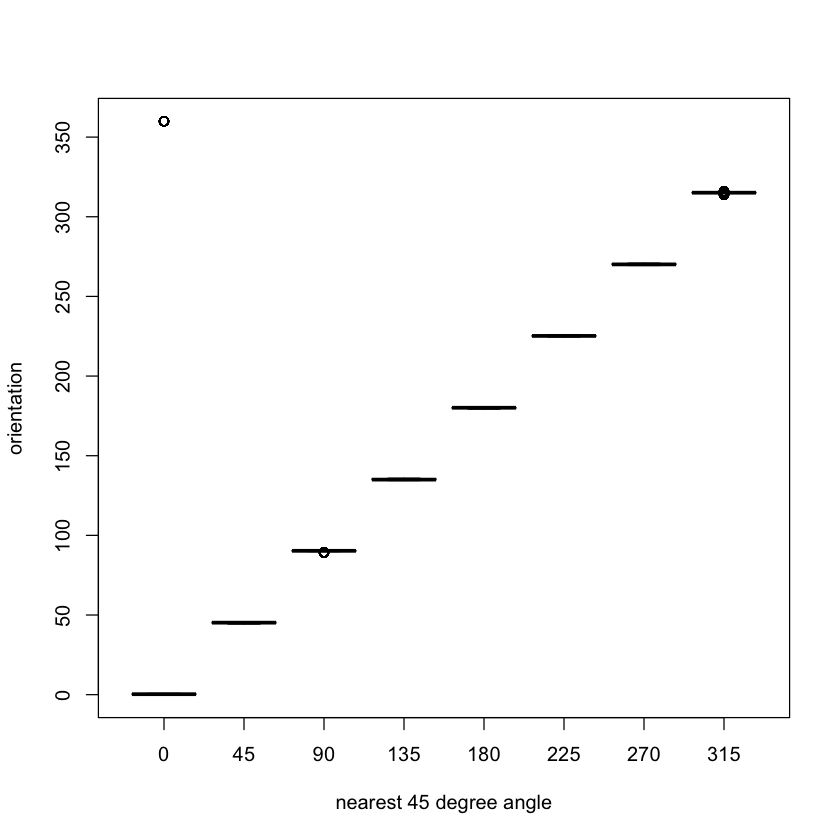

In [99]:
with(offline, boxplot(orientation ~ angle,
                      xlab = "nearest 45 degree angle",
                      ylab="orientation"))